In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

# The Movie Database (tmdb.movies.csv)

In [2]:
df_movies = pd.read_csv('./data/tmdb.movies.csv.gz', index_col=0)

In [3]:
df_movies.sort_values(by='release_date', ascending = False).head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26057,"[27, 80, 80, 80, 80, 80, 80]",570704,en,Murdery Christmas,0.840,2020-12-25,Murdery Christmas,0.0,1
24265,"[10749, 18]",428836,en,Ophelia,8.715,2019-06-28,Ophelia,0.0,4
24892,[99],541577,en,This Changes Everything,3.955,2019-06-28,This Changes Everything,0.0,1
24819,[18],481880,en,Trial by Fire,4.480,2019-05-17,Trial by Fire,7.0,3
24297,[18],415085,en,All Creatures Here Below,8.316,2019-05-17,All Creatures Here Below,5.0,5
24003,"[18, 9648, 53]",411144,en,We Have Always Lived in the Castle,14.028,2019-05-17,We Have Always Lived in the Castle,5.2,24
25006,[99],500850,es,El silencio de otros,3.299,2019-05-08,The Silence of Others,8.5,15
24612,[99],541576,en,Meeting Gorbachev,5.870,2019-05-03,Meeting Gorbachev,10.0,3
24691,"[18, 28, 80]",547590,en,El Chicano,5.274,2019-05-03,El Chicano,9.0,1
25012,[99],523994,en,Hesburgh,3.262,2019-04-26,Hesburgh,10.0,1


In [4]:
df_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
df_movies.shape


(26517, 9)

In [6]:
df_movies[['original_title', 'release_date']].duplicated().sum()

1026

In [7]:
df_movies.drop_duplicates(subset=['original_title', 'release_date'], inplace=True)

In [8]:
df_movies.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25491 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25491 non-null  object 
 1   id                 25491 non-null  int64  
 2   original_language  25491 non-null  object 
 3   original_title     25491 non-null  object 
 4   popularity         25491 non-null  float64
 5   release_date       25491 non-null  object 
 6   title              25491 non-null  object 
 7   vote_average       25491 non-null  float64
 8   vote_count         25491 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [10]:
df_movies['genre_ids'].value_counts()

[99]                        3564
[]                          2459
[18]                        2118
[35]                        1622
[27]                        1125
                            ... 
[14, 12, 878, 28]              1
[80, 28, 12, 53]               1
[16, 878, 35, 10751]           1
[16, 35, 12, 10751, 878]       1
[16, 10751, 35, 14]            1
Name: genre_ids, Length: 2477, dtype: int64

### Genre Keys
We can match these with the numbers in "genre_ids" column
(per https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee)
- Action          28
- Adventure       12
- Animation       16
- Comedy          35
- Crime           80
- Documentary     99
- Drama           18
- Family          10751
- Fantasy         14
- History         36
- Horror          27
- Music           10402
- Mystery         9648
- Romance         10749
- Science Fiction 878
- TV Movie        10770
- Thriller        53
- War             10752
- Western         37

Adding new column for genre!

In [11]:
df_movies.drop(df_movies[df_movies['genre_ids'] == '[]'].index, inplace=True)

In [12]:
genre_dict = {28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}

In [13]:
df_movies['genres'] = df_movies['genre_ids'].str.split(',')
new_list_2 = []
for item in df_movies['genres']:
    new_list = []
    for string in item:
        l = int(''.join(c for c in string if c.isalnum()))
        new_list.append(genre_dict[l])
    new_list_2.append(new_list)
    
df_movies['genres'] = new_list_2
    

df_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]"
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]"
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]"


In [39]:
def get_genre_count(movies_dict):
    genre_count = {}

    for movie in movies_dict['genres']:
        for genre in movie:
            if genre in genre_count.keys():
                genre_count[genre] += 1
            else:
                genre_count[genre] = 1
    return genre_count

get_genre_count(df_movies)

{'Adventure': 1334,
 'Fantasy': 1082,
 'Family': 1523,
 'Animation': 1436,
 'Action': 2534,
 'Science Fiction': 1687,
 'Comedy': 5431,
 'Thriller': 3989,
 'Horror': 3547,
 'Crime': 1425,
 'Drama': 7765,
 'Romance': 2223,
 'Music': 1228,
 'Mystery': 1171,
 'History': 569,
 'Western': 193,
 'TV Movie': 1067,
 'War': 318,
 'Documentary': 4776}

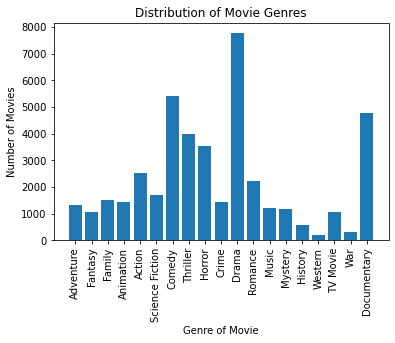

In [15]:
fig, ax = plt.subplots()

ax.bar(x = list(genre_count.keys()), height = list(genre_count.values()));
ax.tick_params(axis='x', labelrotation = 90);
ax.set_ylabel('Number of Movies');
ax.set_xlabel('Genre of Movie');
ax.set_title('Distribution of Movie Genres');

In [16]:
df_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]"
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]"
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]"


In [17]:
df_movies.describe()

,id,popularity,vote_average,vote_count
count,23032.000000,23032.000000,23032.000000,23032.000000
mean,291514.949418,3.287726,5.970376,197.716221
std,156598.776480,4.411814,1.792639,959.900284
min,27.000000,0.600000,0.000000,1.000000
25%,144582.250000,0.631000,5.000000,2.000000
50%,304035.500000,1.443000,6.000000,6.000000
75%,421264.250000,4.188750,7.000000,32.000000
max,608079.000000,80.773000,10.000000,22186.000000


In [56]:
def get_avg_rating(movies_dict, genres_dict):  
    cumulative_rating = []
    genres = list(genres_dict.values())
        
    for genre in genres:
        rating = movies_dict.loc[movies_dict['genres'].astype(str).str.contains(genre), 'vote_average']
        rating = rating.cumsum().iloc[-1]
        average_rating = round(rating / get_genre_count(movies_dict)[genre], 2)
        cumulative_rating.append(average_rating)

    genre_ratings = dict(zip(genres, cumulative_rating))
    return genre_ratings

avg_full = get_avg_rating(df_movies, genre_dict)

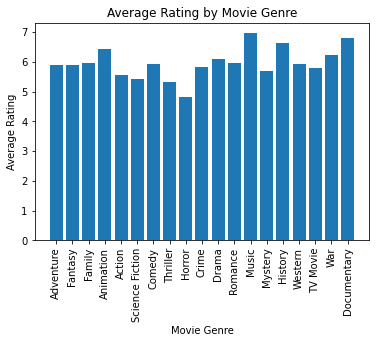

In [57]:
fig, ax = plt.subplots()

ax.bar(x = list(genre_ratings.keys()), height = list(genre_ratings.values()));
ax.tick_params(axis='x', rotation=90);
ax.set_title('Average Rating by Movie Genre');
ax.set_ylabel('Average Rating');
ax.set_xlabel('Movie Genre');

### Determine if the number of votes for each movie affects the average rating. First, we will ignore the bottom 25% of vote counts, then 50%, and finally 75%.

Create movies dataframe with movies that received more than 2 votes.

In [50]:
df_movies_25 = df_movies[df_movies['vote_count'] > 2]

In [54]:
avg_25th = get_avg_rating(df_movies_25, genre_dict)

Create movies dataframe with movies that received more than 6 votes.

In [52]:
df_movies_50 = df_movies[df_movies['vote_count'] > 6]

In [55]:
avg_50th = get_avg_rating(df_movies_50, genre_dict)

Create movies dataframe with movies that received more than 32 votes.

In [58]:
df_movies_75 = df_movies[df_movies['vote_count'] > 32]

In [59]:
avg_75th = get_avg_rating(df_movies_75, genre_dict)

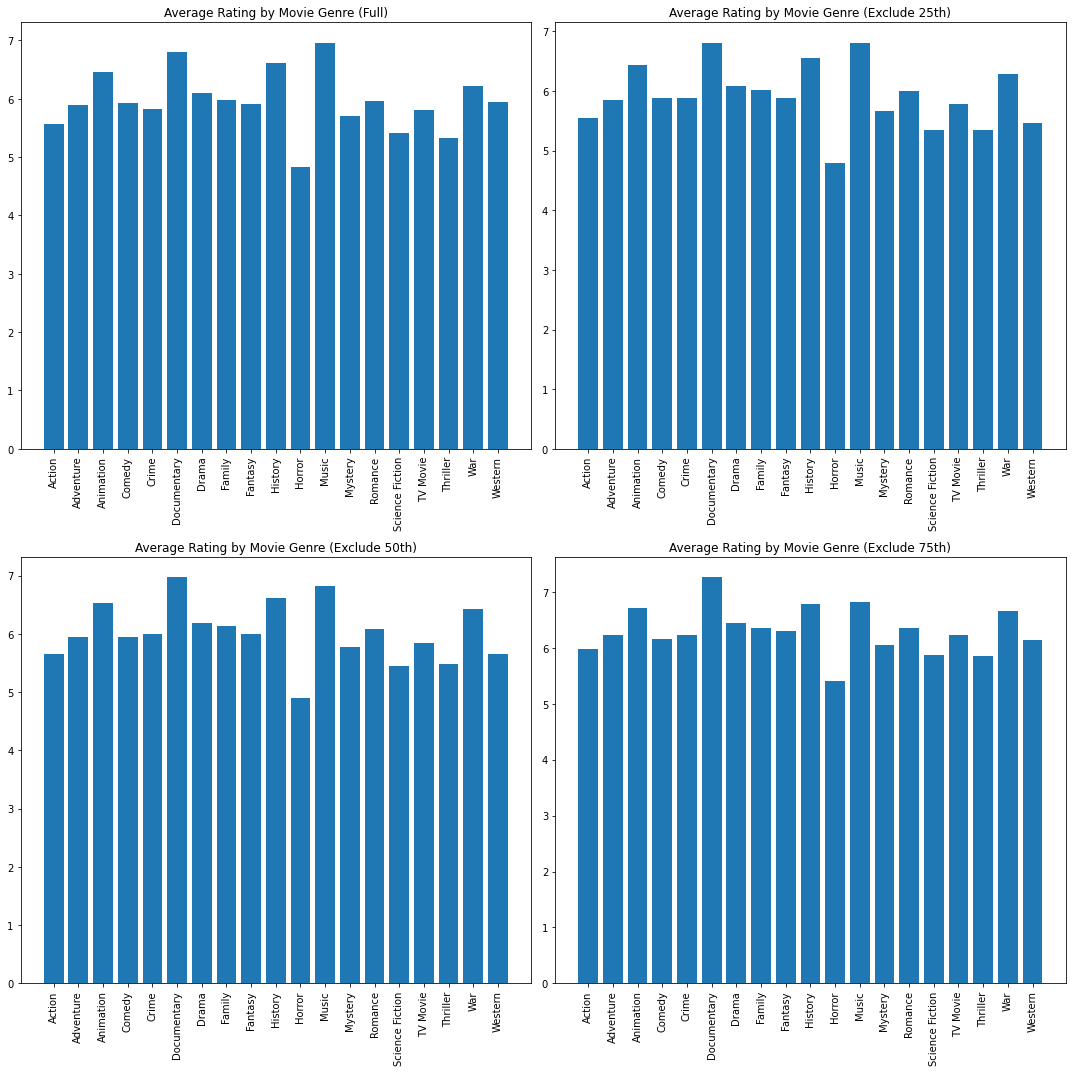

In [72]:
fig, ax = plt.subplots(figsize=(15,15), ncols=2, nrows=2)

ax[0,0].bar(x=list(avg_full.keys()), height=list(avg_full.values()));
ax[0,0].tick_params(axis='x', rotation=90);
ax[0,0].set_title('Average Rating by Movie Genre (Full)');

ax[0,1].bar(x=list(avg_25th.keys()), height=list(avg_25th.values()));
ax[0,1].tick_params(axis='x', rotation=90);
ax[0,1].set_title('Average Rating by Movie Genre (Exclude 25th)');

ax[1,0].bar(x=list(avg_50th.keys()), height=list(avg_50th.values()));
ax[1,0].tick_params(axis='x', rotation=90);
ax[1,0].set_title('Average Rating by Movie Genre (Exclude 50th)');

ax[1,1].bar(x=list(avg_75th.keys()), height=list(avg_75th.values()));
ax[1,1].tick_params(axis='x', rotation=90);
ax[1,1].set_title('Average Rating by Movie Genre (Exclude 75th)');

fig.tight_layout()

### Based on the four above graphs, the number of votes a movie received does not appear to influence the average rating by movie genre.

# Rotten Tomatoes (rt.movie_info.tsv)

In [12]:
df_info = pd.read_csv('./data/rt.movie_info.tsv.gz', delimiter='\t')

In [13]:
df_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [14]:
df_info['theater_date'] = pd.to_datetime(df_info['theater_date'])

df_info.sort_values(by='theater_date', ascending = False).head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
973,1264,The Super centers on the mysterious disappeara...,R,Mystery and Suspense,Stephan Rick,NaN,2018-10-19,"Dec 18, 2018",NaN,NaN,90 minutes,NaN
813,1050,In the tradition of Amblin classics where fant...,PG,Comedy|Kids and Family|Science Fiction and Fan...,Eli Roth,Eric Kripke,2018-09-21,"Nov 27, 2018",NaN,NaN,104 minutes,Universal Pictures
1023,1325,From the outer reaches of space to the small-t...,R,Action and Adventure|Horror|Science Fiction an...,Shane Black,Shane Black|Fred Dekker,2018-09-14,"Nov 27, 2018",NaN,NaN,NaN,NaN
102,131,No Sesame. All Street. THE HAPPYTIME MURDERS i...,R,Action and Adventure|Comedy,Brian Henson,Todd Berger|Dee Austin Robertson,2018-08-24,"Dec 4, 2018",NaN,NaN,NaN,STXfilms
1430,1845,A group of wealthy boys in Los Angeles during ...,R,Drama|Mystery and Suspense,James Cox,Captain Mauzner|James Cox,2018-08-17,"Sep 18, 2018",NaN,NaN,100 minutes,NaN
1064,1374,Cameron Post (Chlo,NR,Drama,Desiree Akhavan,Desiree Akhavan|Cecilia Frugiuele,2018-08-03,"Dec 3, 2018",NaN,NaN,90 minutes,FilmRise
1201,1541,"In the heatwarming live action adventure ""Disn...",PG,Action and Adventure|Comedy|Kids and Family,Marc Forster,Alex Ross Perry,2018-08-03,"Nov 6, 2018",NaN,NaN,NaN,Walt Disney Pictures
319,419,When teens mysteriously develop powerful new a...,PG-13,Mystery and Suspense|Science Fiction and Fantasy,Jennifer Yuh Nelson,Chad Hodge,2018-08-03,"Oct 30, 2018",NaN,NaN,105 minutes,20th Century Fox
446,585,Denzel Washington returns to one of his signat...,R,Action and Adventure|Mystery and Suspense,Antoine Fuqua,Richard Wenk,2018-07-20,"Dec 11, 2018",NaN,NaN,129 minutes,Columbia Pictures
1003,1297,"Based on true events, WOMAN WALKS AHEAD tells ...",R,Drama,Susanna White,Steven Knight,2018-06-29,"Aug 28, 2018",NaN,NaN,102 minutes,NaN


In [15]:
df_info.shape

(1560, 12)

In [16]:
df_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [17]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   synopsis      1498 non-null   object        
 2   rating        1557 non-null   object        
 3   genre         1552 non-null   object        
 4   director      1361 non-null   object        
 5   writer        1111 non-null   object        
 6   theater_date  1201 non-null   datetime64[ns]
 7   dvd_date      1201 non-null   object        
 8   currency      340 non-null    object        
 9   box_office    340 non-null    object        
 10  runtime       1530 non-null   object        
 11  studio        494 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 146.4+ KB


# The Numbers (tn.movie_budgets.csv)

In [20]:
df_budget = pd.read_csv('./data/tn.movie_budgets.csv.gz', index_col=0)

In [21]:
df_budget['release_date'] = pd.to_datetime(df_budget['release_date'])

In [22]:
df_budget.sort_values(by='release_date', ascending=False).head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
95,2020-12-31,Moonfall,"$150,000,000",$0,$0
6,2020-12-31,Hannibal the Conqueror,"$50,000,000",$0,$0
36,2020-02-21,Call of the Wild,"$82,000,000",$0,$0
81,2019-12-31,Army of the Dead,"$90,000,000",$0,$0
16,2019-12-31,Eli,"$11,000,000",$0,$0
72,2019-12-31,355,"$75,000,000",$0,$0
44,2019-12-31,Down Under Cover,"$40,000,000",$0,$0
30,2019-12-31,Reagan,"$25,000,000",$0,$0
13,2019-12-31,Rogue City,"$13,000,000",$0,$0


In [23]:
df_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
df_budget.shape

(5782, 5)

In [25]:
df_budget.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [26]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   object        
 3   domestic_gross     5782 non-null   object        
 4   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 271.0+ KB


# Box Office Mojo (bom.movie_gross.csv)



In [28]:
df_gross = pd.read_csv('./data/bom.movie_gross.csv.gz')

In [29]:
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [30]:
df_gross.sort_values(by='year', ascending=False)

,title,studio,domestic_gross,foreign_gross,year
3386,An Actor Prepares,Grav.,1700.0,NaN,2018
3183,On the Basis of Sex,Focus,24600000.0,13600000,2018
3176,Tyler Perry's Acrimony,LGF,43500000.0,2900000,2018
3177,Mary Queen of Scots,Focus,16500000.0,29900000,2018
3178,The Possession of Hannah Grace,SGem,14800000.0,28200000,2018
...,...,...,...,...,...
220,After.Life,Anch.,109000.0,1900000,2010
221,Cairo Time,IFC,1600000.0,391000,2010
222,Flipped,WB,1800000.0,NaN,2010
223,Guzaarish,UTV,1000000.0,695000,2010


In [33]:
df_gross.shape

(3387, 5)

In [31]:
df_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [32]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# IM.DB

In [51]:
conn = sqlite3.Connection("./data/im.db")

In [52]:
q0 = """
SELECT *
FROM movie_ratings
;
"""

df_ratings = pd.read_sql(q0, conn)

In [53]:
df_ratings.shape

(73856, 3)

In [54]:
df_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [55]:
q1 = """
SELECT *
FROM movie_akas
;
"""

df_movie_akas = pd.read_sql(q1, conn)

In [56]:
df_movie_akas.shape

(331703, 8)

In [57]:
df_movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [40]:
q2 = """
SELECT *
FROM movie_basics
;
"""

df_movie_basics = pd.read_sql(q2, conn)


In [41]:
df_movie_basics.shape

(146144, 6)

In [42]:
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [43]:
pd.read_sql("""
SELECT *
FROM movie_basics
WHERE
    start_year > 2010 AND
    start_year <= 2022
ORDER BY
    start_year DESC
;
"""

,conn)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10042446,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
1,tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
2,tt10108854,The Hunchback of the Lighthouse,The Hunchback of the Lighthouse,2022,120.0,Drama
3,tt10251718,Corazones en Llamas 5,Corazones en Llamas 5,2022,NaN,Action
4,tt10288908,The Weary Traveler,The Weary Traveler,2022,NaN,Horror
...,...,...,...,...,...,...
134279,tt9844420,Star High,Star High,2011,66.0,Sci-Fi
134280,tt9856614,Kanun il sangue e l'onore,Kanun il sangue e l'onore,2011,NaN,Documentary
134281,tt9878416,Xing Fu De Xiang Ri Kui,Xing Fu De Xiang Ri Kui,2011,NaN,Drama
134282,tt9896506,Six Hours With Terrorists,Six Hours With Terrorists,2011,NaN,Drama


In [73]:
pd.read_sql("""
SELECT *
FROM principals
""", conn).head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [74]:
pd.read_sql("""
SELECT *
FROM persons
""", conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [44]:
conn.close()

# Problem & Questions

Business Problem:

You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Questions:

- What genre of movies are doing well currently? 
    - are movie franchises, i.e. star wars, marvel, harry potter, etc. any better than one-offs when measuring success
- what does "doing well" mean?
    - presumably, total gross > production budget. The Numbers (data source) includes domestic & international in Worldwide Gross.   
    - based on the data we have, we could measure by worldwide gross, imdb rating, The Movie Database popularity
    - both are important for a new studio, probably lean toward measuring success monetarily. need some easy wins 
        - maybe measure against MSFT financial position?
- what actors are in those successful movies?
- what writers/directors are responsible for the movies?
- is rating significant?
- does movie length have any impact?




Data Clearning Thoughts:

- We'll need to decide what "doing well currently" means. We'll be able to eliminate a lot of bloat by ignoring things that were released too long ago to be relevant. Maybe we start at movies released in the last 10-15 years?

- probably want to identify the categories we want from each csv/db and then create one dataframe to work with. In addition to making comparisons easier, I think that's our most realistic path to solving the file size issue git has with im.db.

- the im.db file has the most records by far of any of our data sources. I think maybe we could make our starting position the movie_basics table (146k rows), and then add columns from the other sources to it and drop records for which we don't have enough info.

- remember we don't have to use all data sources--don't want to create problems with unknown values if a data file is super short (rotten tomatoes). Will see what happens with that.


Taking a stab at the columns in our ideal dataframe:
   - Movie Title
   - Genre(s)
   - Release Year
   - Rating (R/PG-13/etc)
   - Total Gross
   - Production Budget
   - Associated Actors/Star/TBD
   - Writer
   - Director
   - Run Time
   - IMDB Rating
   - The Movie Database Popularity (still need to understand what this is)
   - The Movie Database Vote Count